## For Core PCOS Dataset

In [2]:
# import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split

core_pcos_df = pd.read_csv("Core_PCOS_Dataset_Cleaned.csv")

# Display a sample of the raw Core PCOS dataset before preprocessing
print("Raw Core PCOS Dataset Sample:")
print(core_pcos_df.head())


Raw Core PCOS Dataset Sample:
   Sl. No  Patient File No.  PCOS (Y/N)   Age (yrs)  Weight (Kg)  Height(Cm)   \
0       1                 1           0        28.0         44.6        152.0   
1       2                 2           0        36.0         65.0        161.5   
2       3                 3           1        33.0         68.8        165.0   
3       4                 4           0        37.0         65.0        148.0   
4       5                 5           0        25.0         52.0        161.0   

    BMI  Blood Group  Pulse rate(bpm)   RR (breaths/min)  ...  Pimples(Y/N)  \
0  19.3         15.0              78.0              22.0  ...           0.0   
1  24.9         15.0              74.0              20.0  ...           0.0   
2  25.3         11.0              72.0              18.0  ...           1.0   
3  29.7         13.0              72.0              20.0  ...           0.0   
4  20.1         11.0              72.0              18.0  ...           0.0   

   Fast 

In [4]:
# Step 2: Cleaning and Preprocessing the Data (Core PCOS Dataset for Decision Trees)

# Strip any extra spaces from column names
core_pcos_df.columns = core_pcos_df.columns.str.strip()

# Selecting relevant features and target variable for Decision Tree classification
selected_columns = ["Age (yrs)", "BMI", "hair growth(Y/N)", "Hair loss(Y/N)", "Pimples(Y/N)", "PCOS (Y/N)"]
pcos_tree_df = core_pcos_df[selected_columns].copy()

# Convert categorical values to numerical (ensuring binary features are integer type)
pcos_tree_df["hair growth(Y/N)"] = pcos_tree_df["hair growth(Y/N)"].astype(int)
pcos_tree_df["Hair loss(Y/N)"] = pcos_tree_df["Hair loss(Y/N)"].astype(int)
pcos_tree_df["Pimples(Y/N)"] = pcos_tree_df["Pimples(Y/N)"].astype(int)
pcos_tree_df["PCOS (Y/N)"] = pcos_tree_df["PCOS (Y/N)"].astype(int)

# Display cleaned dataset sample
print("Cleaned and Preprocessed Core PCOS Dataset Sample:")
print(pcos_tree_df.head(25).to_string(index=False))


Cleaned and Preprocessed Core PCOS Dataset Sample:
 Age (yrs)  BMI  hair growth(Y/N)  Hair loss(Y/N)  Pimples(Y/N)  PCOS (Y/N)
      28.0 19.3                 0               0             0           0
      36.0 24.9                 0               0             0           0
      33.0 25.3                 0               1             1           1
      37.0 29.7                 0               0             0           0
      25.0 20.1                 0               1             0           0
      36.0 27.2                 0               1             0           0
      34.0 26.3                 0               0             0           0
      33.0 23.1                 0               0             0           0
      32.0 16.0                 0               0             0           0
      36.0 23.1                 0               0             0           0
      20.0 26.7                 0               0             0           0
      26.0 19.1                 0    

In [6]:
# Step 3: Splitting the Data into Training and Testing Sets

# Defining features (X) and target variable (y)
X_tree = pcos_tree_df.drop(columns=["PCOS (Y/N)"])  # Features
y_tree = pcos_tree_df["PCOS (Y/N)"]  # Target variable

# Splitting the dataset into training (80%) and testing (20%) sets
X_train_tree, X_test_tree, y_train_tree, y_test_tree = train_test_split(
    X_tree, y_tree, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print("Training Set Shape:", X_train_tree.shape, y_train_tree.shape)
print("Testing Set Shape:", X_test_tree.shape, y_test_tree.shape)

# Display a small sample of the training and testing sets
print("\nTraining Data Sample:")
print(X_train_tree.head(15))

print("\nTesting Data Sample:")
print(X_test_tree.head(15))


Training Set Shape: (865, 5) (865,)
Testing Set Shape: (217, 5) (217,)

Training Data Sample:
      Age (yrs)   BMI  hair growth(Y/N)  Hair loss(Y/N)  Pimples(Y/N)
816        31.0  24.2                 0               0             0
237        25.0  17.7                 0               1             1
621        31.0  24.2                 0               0             0
630        31.0  24.2                 0               0             0
275        27.0  20.3                 0               0             0
306        41.0  16.6                 1               0             1
593        31.0  24.2                 0               0             0
344        36.0  24.8                 0               1             1
855        31.0  24.2                 0               0             0
1034       31.0  24.2                 0               0             0
598        31.0  24.2                 0               0             0
841        31.0  24.2                 0               0           

In [8]:
# Step 4: Implementing Decision Tree Models

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Initialize the Decision Tree classifier
dt_classifier = DecisionTreeClassifier(criterion="gini", random_state=42)

# Train the model
dt_classifier.fit(X_train_tree, y_train_tree)

# Make predictions on the test set
y_pred_tree = dt_classifier.predict(X_test_tree)

# Compute accuracy
accuracy_tree = accuracy_score(y_test_tree, y_pred_tree)

# Compute confusion matrix
conf_matrix_tree = confusion_matrix(y_test_tree, y_pred_tree)

# Display model performance
print(f"Decision Tree Model Accuracy: {accuracy_tree:.2f}")

# Display confusion matrix
print("\nConfusion Matrix - Decision Tree:")
print(conf_matrix_tree)


Decision Tree Model Accuracy: 0.71

Confusion Matrix - Decision Tree:
[[134  14]
 [ 49  20]]


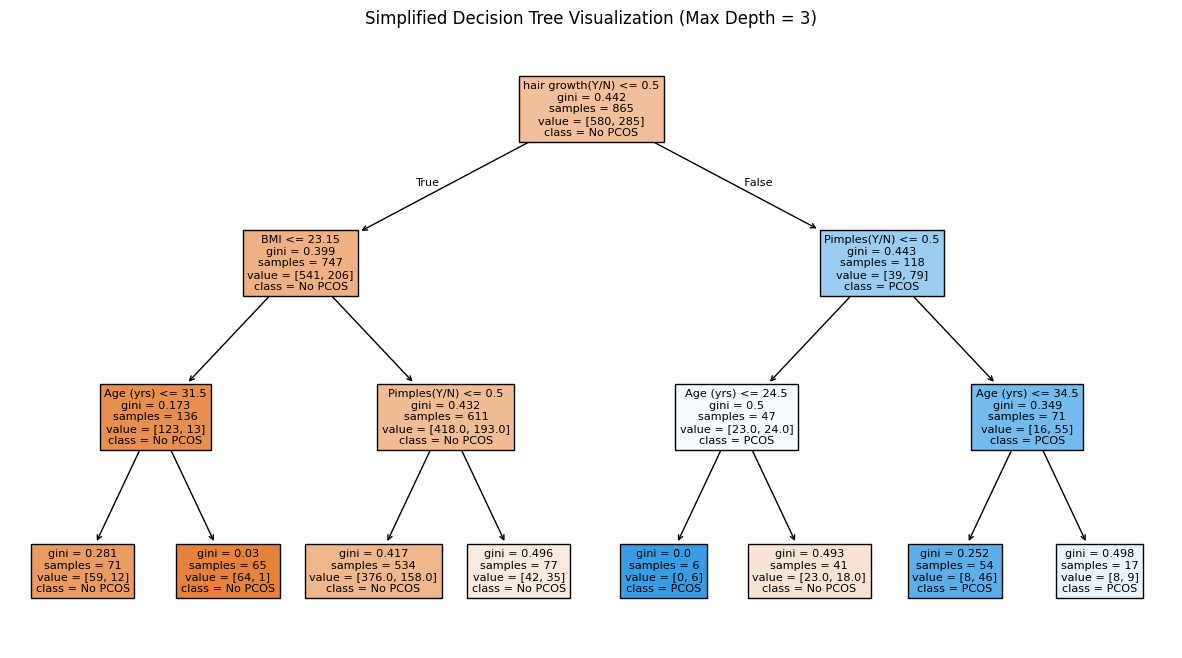

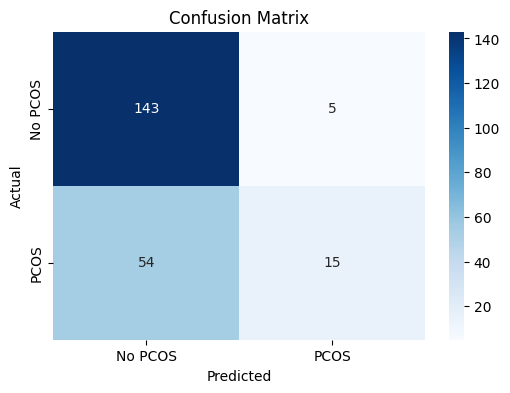

In [14]:
# Step 5: Visualizing the Decision Tree and Confusion Matrix

dt_classifier_limited = DecisionTreeClassifier(criterion="gini", max_depth=3, random_state=42)
dt_classifier_limited.fit(X_train_tree, y_train_tree)
y_pred_limited = dt_classifier_limited.predict(X_test_tree)
conf_matrix_limited = confusion_matrix(y_test_tree, y_pred_limited)

# Plot the simplified decision tree structure
plt.figure(figsize=(15, 8))
plot_tree(dt_classifier_limited, feature_names=X_tree.columns, class_names=["No PCOS", "PCOS"], filled=True)
plt.title("Simplified Decision Tree Visualization (Max Depth = 3)")
plt.show()

# Plot the confusion matrix heatmap for the limited tree
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_limited, annot=True, fmt="d", cmap="Blues",
            xticklabels=["No PCOS", "PCOS"], yticklabels=["No PCOS", "PCOS"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


Feature Importance Ranking:
hair growth(Y/N): 0.5513
BMI: 0.1884
Age (yrs): 0.1324
Pimples(Y/N): 0.1279
Hair loss(Y/N): 0.0000


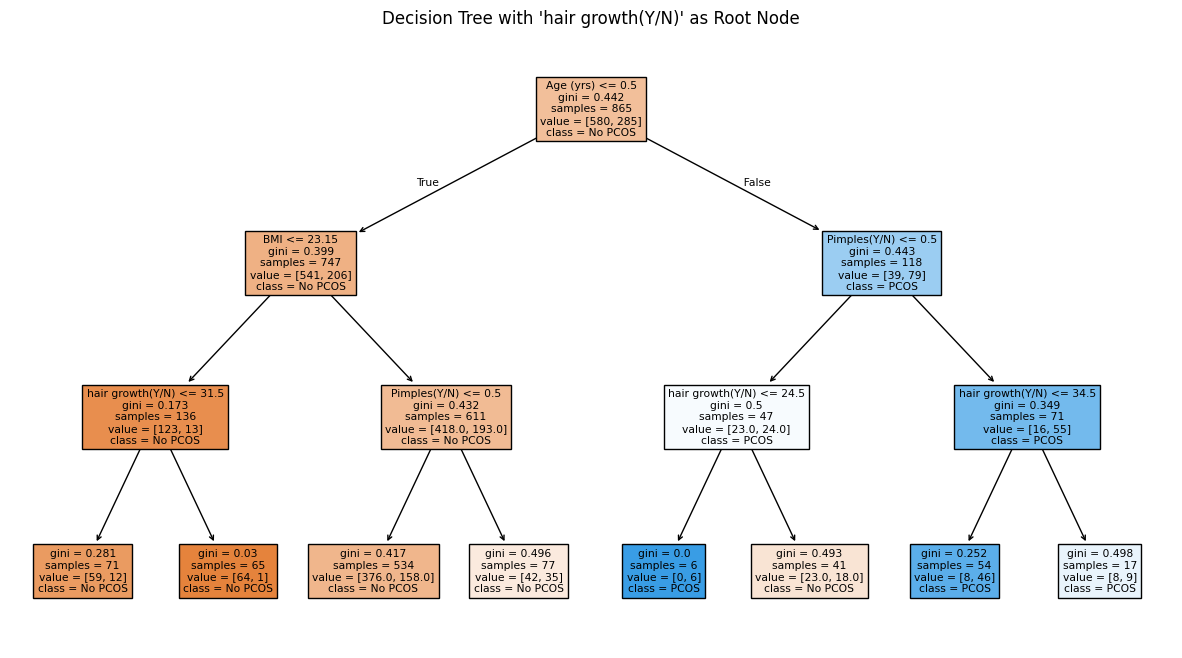

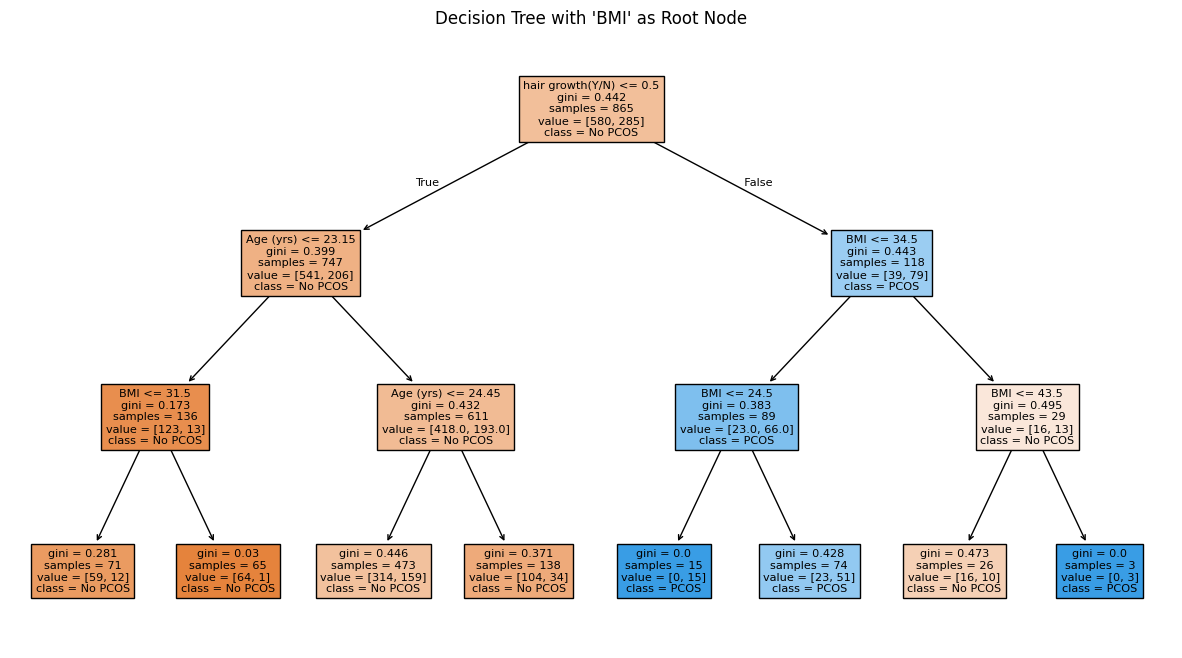

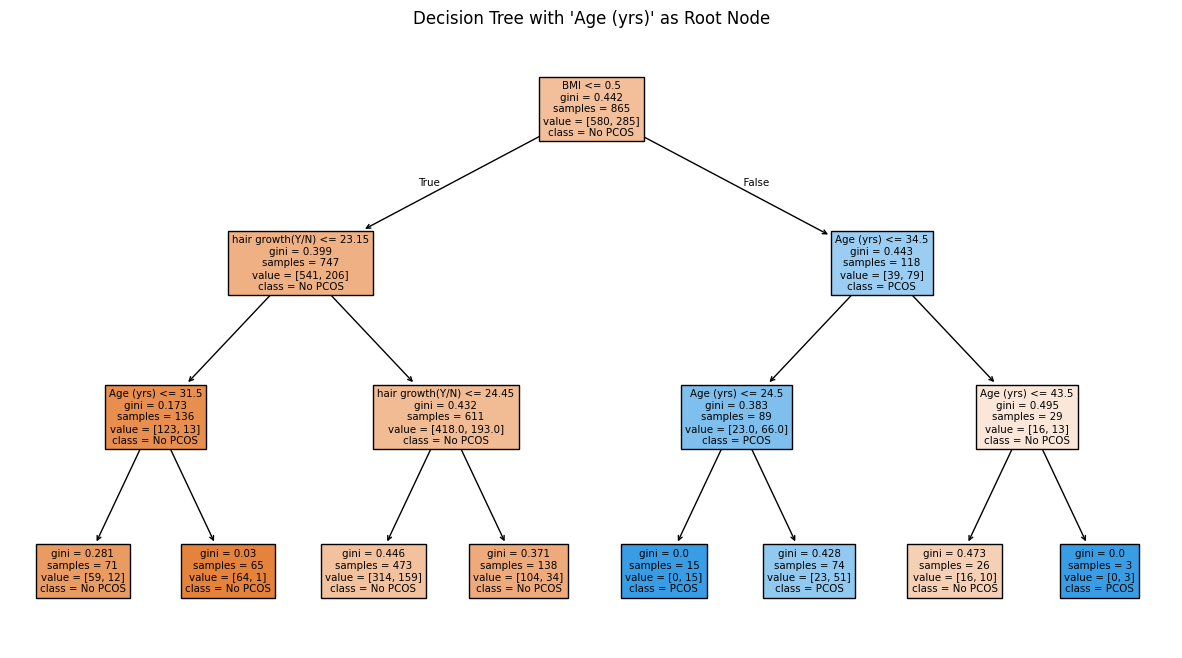

In [10]:
# Step 8: Corrected Decision Trees with Different Root Nodes

from sklearn.tree import DecisionTreeClassifier
import numpy as np

# Train a baseline Decision Tree to check feature importances
baseline_tree = DecisionTreeClassifier(criterion="gini", random_state=42, max_depth=3)
baseline_tree.fit(X_train_tree, y_train_tree)

# Extract feature importances to see which feature is naturally chosen as the root
feature_importances = baseline_tree.feature_importances_
feature_names = np.array(X_train_tree.columns)

# Display feature importance rankings
feature_importance_ranking = sorted(zip(feature_names, feature_importances), key=lambda x: x[1], reverse=True)
print("Feature Importance Ranking:")
for feature, importance in feature_importance_ranking:
    print(f"{feature}: {importance:.4f}")

# Identify the top 3 most important features
top_features = [feature_importance_ranking[i][0] for i in range(3)]

# Train Decision Trees prioritizing different root nodes by ordering features
dt_top1_root = DecisionTreeClassifier(criterion="gini", random_state=42, max_depth=3)
dt_top1_root.fit(X_train_tree[top_features + list(set(X_train_tree.columns) - set(top_features))], y_train_tree)

dt_top2_root = DecisionTreeClassifier(criterion="gini", random_state=42, max_depth=3)
dt_top2_root.fit(X_train_tree[top_features[1:] + [top_features[0]]], y_train_tree)

dt_top3_root = DecisionTreeClassifier(criterion="gini", random_state=42, max_depth=3)
dt_top3_root.fit(X_train_tree[top_features[2:] + top_features[:2]], y_train_tree)

# Visualizing the Decision Trees with different root nodes
plt.figure(figsize=(15, 8))
plot_tree(dt_top1_root, feature_names=X_train_tree.columns, class_names=["No PCOS", "PCOS"], filled=True)
plt.title(f"Decision Tree with '{top_features[0]}' as Root Node")
plt.show()

plt.figure(figsize=(15, 8))
plot_tree(dt_top2_root, feature_names=X_train_tree.columns, class_names=["No PCOS", "PCOS"], filled=True)
plt.title(f"Decision Tree with '{top_features[1]}' as Root Node")
plt.show()

plt.figure(figsize=(15, 8))
plot_tree(dt_top3_root, feature_names=X_train_tree.columns, class_names=["No PCOS", "PCOS"], filled=True)
plt.title(f"Decision Tree with '{top_features[2]}' as Root Node")
plt.show()


In [11]:
# Step 9: Confusion Matrices for the Decision Trees with Different Root Nodes

from sklearn.metrics import confusion_matrix, accuracy_score

# Ensure test features are aligned with training order for each tree
X_test_tree_top1 = X_test_tree[top_features + list(set(X_test_tree.columns) - set(top_features))]
X_test_tree_top2 = X_test_tree[top_features[1:] + [top_features[0]]]
X_test_tree_top3 = X_test_tree[top_features[2:] + top_features[:2]]

# Predictions for each model
y_pred_top1 = dt_top1_root.predict(X_test_tree_top1)
y_pred_top2 = dt_top2_root.predict(X_test_tree_top2)
y_pred_top3 = dt_top3_root.predict(X_test_tree_top3)

# Accuracy and confusion matrices
acc_top1 = accuracy_score(y_test_tree, y_pred_top1)
acc_top2 = accuracy_score(y_test_tree, y_pred_top2)
acc_top3 = accuracy_score(y_test_tree, y_pred_top3)

cm_top1 = confusion_matrix(y_test_tree, y_pred_top1)
cm_top2 = confusion_matrix(y_test_tree, y_pred_top2)
cm_top3 = confusion_matrix(y_test_tree, y_pred_top3)

# Output results
print(f"Tree with '{top_features[0]}' as Root Node - Accuracy: {acc_top1:.2f}\nConfusion Matrix:\n{cm_top1}\n")
print(f"Tree with '{top_features[1]}' as Root Node - Accuracy: {acc_top2:.2f}\nConfusion Matrix:\n{cm_top2}\n")
print(f"Tree with '{top_features[2]}' as Root Node - Accuracy: {acc_top3:.2f}\nConfusion Matrix:\n{cm_top3}\n")


Tree with 'hair growth(Y/N)' as Root Node - Accuracy: 0.73
Confusion Matrix:
[[143   5]
 [ 54  15]]

Tree with 'BMI' as Root Node - Accuracy: 0.73
Confusion Matrix:
[[142   6]
 [ 53  16]]

Tree with 'Age (yrs)' as Root Node - Accuracy: 0.73
Confusion Matrix:
[[142   6]
 [ 53  16]]



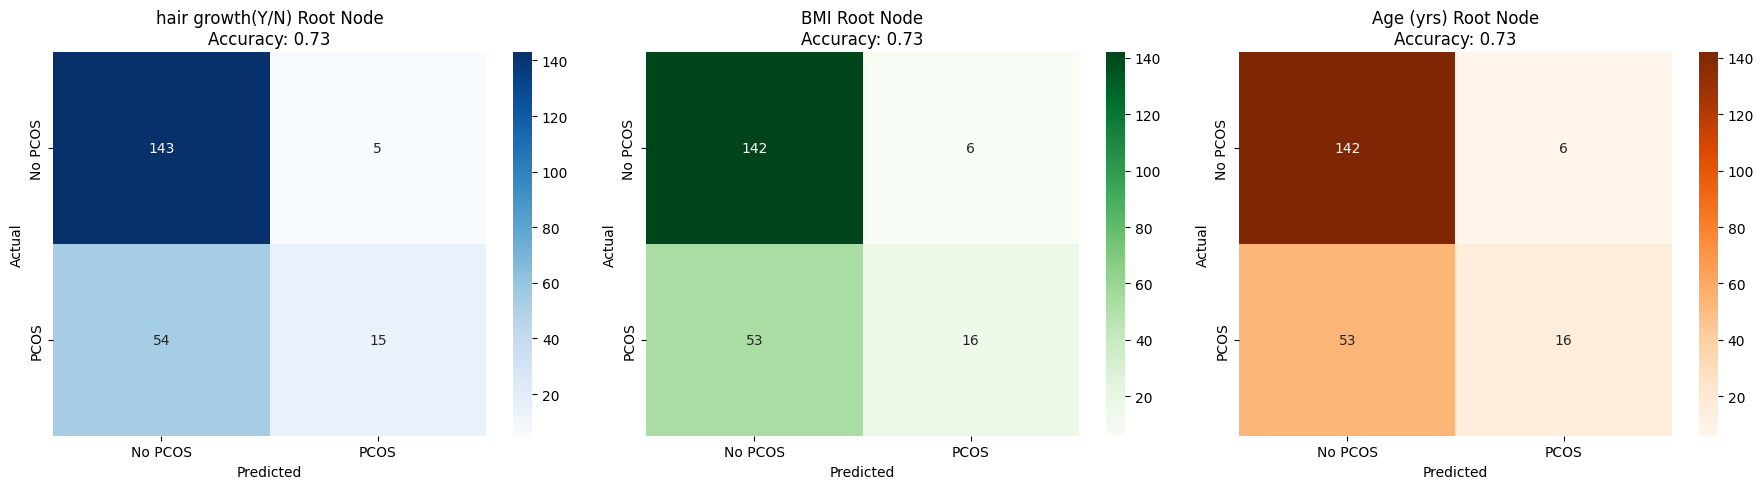

In [12]:
# Step 10: Visualizing the Confusion Matrices

import seaborn as sns
import matplotlib.pyplot as plt

# Set up figure
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot confusion matrix for Tree 1
sns.heatmap(cm_top1, annot=True, fmt="d", cmap="Blues", ax=axes[0],
            xticklabels=["No PCOS", "PCOS"], yticklabels=["No PCOS", "PCOS"])
axes[0].set_title(f"{top_features[0]} Root Node\nAccuracy: {acc_top1:.2f}")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

# Plot confusion matrix for Tree 2
sns.heatmap(cm_top2, annot=True, fmt="d", cmap="Greens", ax=axes[1],
            xticklabels=["No PCOS", "PCOS"], yticklabels=["No PCOS", "PCOS"])
axes[1].set_title(f"{top_features[1]} Root Node\nAccuracy: {acc_top2:.2f}")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

# Plot confusion matrix for Tree 3
sns.heatmap(cm_top3, annot=True, fmt="d", cmap="Oranges", ax=axes[2],
            xticklabels=["No PCOS", "PCOS"], yticklabels=["No PCOS", "PCOS"])
axes[2].set_title(f"{top_features[2]} Root Node\nAccuracy: {acc_top3:.2f}")
axes[2].set_xlabel("Predicted")
axes[2].set_ylabel("Actual")

plt.tight_layout()
plt.show()


## For Global PCOS Demographics Dataset

In [16]:
# Step 1: Loading and Displaying the Raw Dataset (Global PCOS Demographics)

# Load the dataset
global_pcos_df = pd.read_csv("Global_PCOS_Demographics_Cleaned.csv")

# Display a sample of the raw dataset before preprocessing
print("Raw Global PCOS Demographics Dataset Sample:")
print(global_pcos_df.head())


Raw Global PCOS Demographics Dataset Sample:
      Country  Age          BMI Menstrual_Regularity Hirsutism Acne_Severity  \
0  Madagascar   26   overweight              regular       yes        severe   
1     Vietnam   16  underweight              regular       yes           NaN   
2     Somalia   41       normal              regular        no      moderate   
3      Malawi   27       normal            irregular        no          mild   
4      France   26   overweight            irregular       yes           NaN   

  Family_History_of_PCOS Insulin_Resistance  Lifestyle_Score Stress_Levels  \
0                    yes                yes                2           low   
1                     no                yes                4          high   
2                     no                 no                7        medium   
3                     no                 no               10           low   
4                     no                 no                7        medium   

  Urb

In [26]:
# Step 2: Cleaning and Preprocessing the Data (Global PCOS Demographics)

# Strip any extra spaces from column names
global_pcos_df.columns = global_pcos_df.columns.str.strip()

# Selecting relevant features and target variable for Decision Tree classification
selected_columns = ["Age", "BMI", "Hirsutism", "Insulin_Resistance", "Undiagnosed_PCOS_Likelihood", "Diagnosis"]
pcos_demo_tree_df = global_pcos_df[selected_columns].copy()

# Convert categorical variables to numerical
pcos_demo_tree_df["Hirsutism"] = pcos_demo_tree_df["Hirsutism"].map({"yes": 1, "no": 0})
pcos_demo_tree_df["Insulin_Resistance"] = pcos_demo_tree_df["Insulin_Resistance"].map({"yes": 1, "no": 0})
pcos_demo_tree_df["Diagnosis"] = pcos_demo_tree_df["Diagnosis"].map({"yes": 1, "no": 0})

# Convert BMI categories into numerical labels
bmi_mapping = {"underweight": 0, "normal": 1, "overweight": 2, "obese": 3}
pcos_demo_tree_df["BMI"] = pcos_demo_tree_df["BMI"].map(bmi_mapping)

# Drop rows with missing values after transformations
pcos_demo_tree_df.dropna(inplace=True)

# Display cleaned dataset sample
print("Cleaned and Preprocessed Global PCOS Demographics Dataset Sample:")
print(pcos_demo_tree_df.head(25).to_string(index=False))


Cleaned and Preprocessed Global PCOS Demographics Dataset Sample:
 Age  BMI  Hirsutism  Insulin_Resistance  Undiagnosed_PCOS_Likelihood  Diagnosis
  26    2          1                   1                     0.107938          1
  16    0          1                   1                     0.156729          0
  41    1          0                   0                     0.202901          0
  27    1          0                   0                     0.073926          1
  26    2          1                   0                     0.229266          0
  17    2          0                   1                     0.209841          0
  39    3          1                   1                     0.208062          0
  38    1          1                   0                     0.205957          0
  47    1          1                   0                     0.103628          1
  21    0          0                   0                     0.102774          0
  25    1          1                   0   

In [27]:
# Step 3: Splitting the Data into Training and Testing Sets

# Defining features (X) and target variable (y)
X_demo_tree = pcos_demo_tree_df.drop(columns=["Diagnosis"])  # Features
y_demo_tree = pcos_demo_tree_df["Diagnosis"]  # Target variable

# Splitting the dataset into training (80%) and testing (20%) sets
X_train_demo_tree, X_test_demo_tree, y_train_demo_tree, y_test_demo_tree = train_test_split(
    X_demo_tree, y_demo_tree, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print("Training Set Shape:", X_train_demo_tree.shape, y_train_demo_tree.shape)
print("Testing Set Shape:", X_test_demo_tree.shape, y_test_demo_tree.shape)

# Display a small sample of the training and testing sets
print("\nTraining Data Sample:")
print(X_train_demo_tree.head(15))

print("\nTesting Data Sample:")
print(X_test_demo_tree.head(15))




Training Set Shape: (96000, 5) (96000,)
Testing Set Shape: (24000, 5) (24000,)

Training Data Sample:
        Age  BMI  Hirsutism  Insulin_Resistance  Undiagnosed_PCOS_Likelihood
53541    39    3          1                   0                     0.190579
41728    32    1          0                   1                     0.062731
74819    34    1          1                   0                     0.115914
106459   16    0          0                   0                     0.158006
63062    27    2          1                   0                     0.062053
84657    23    2          1                   0                     0.206207
37747    46    2          0                   0                     0.167963
58864    25    1          0                   0                     0.117106
1364     32    2          1                   0                     0.101990
8731     29    2          1                   0                     0.235131
19586    21    3          0                   0    

In [19]:
# Step 4: Implementing Decision Tree Models

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Initialize the Decision Tree classifier
dt_demo_classifier = DecisionTreeClassifier(criterion="gini", random_state=42)

# Train the model
dt_demo_classifier.fit(X_train_demo_tree, y_train_demo_tree)

# Make predictions on the test set
y_pred_demo_tree = dt_demo_classifier.predict(X_test_demo_tree)

# Compute accuracy
accuracy_demo_tree = accuracy_score(y_test_demo_tree, y_pred_demo_tree)

# Compute confusion matrix
conf_matrix_demo_tree = confusion_matrix(y_test_demo_tree, y_pred_demo_tree)

# Display model performance
print(f"Decision Tree Model Accuracy: {accuracy_demo_tree:.2f}")

# Display confusion matrix
print("\nConfusion Matrix - Decision Tree:")
print(conf_matrix_demo_tree)


Decision Tree Model Accuracy: 0.80

Confusion Matrix - Decision Tree:
[[18886  2571]
 [ 2263   280]]


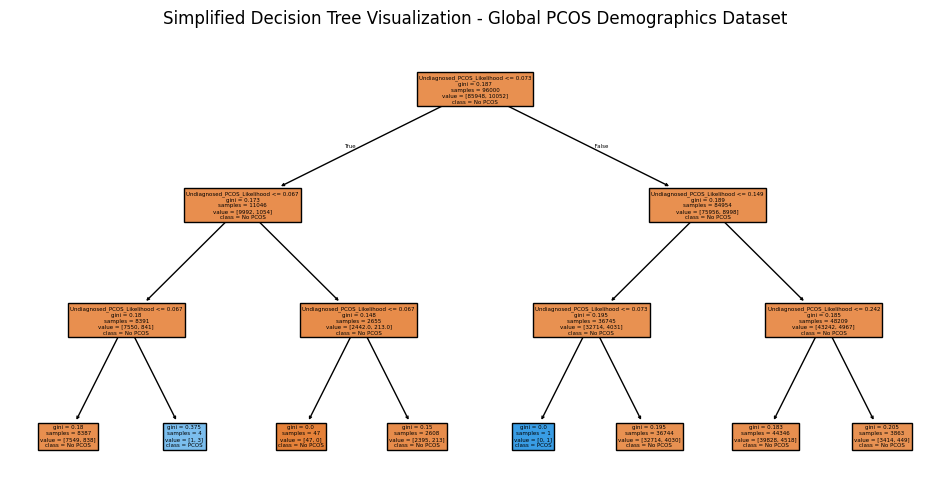

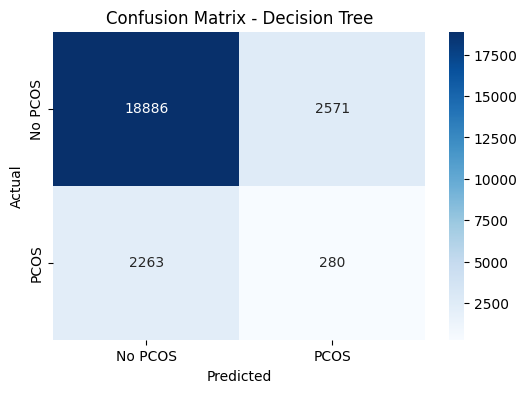

In [33]:
# Step 5: Visualizing the Decision Tree and Confusion Matrix

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree

# Limit tree depth further to improve visualization
dt_demo_limited_depth2 = DecisionTreeClassifier(criterion="gini", max_depth=3, random_state=42)
dt_demo_limited_depth2.fit(X_train_demo_tree, y_train_demo_tree)

# Plot the further simplified decision tree structure
plt.figure(figsize=(12, 6))
plot_tree(dt_demo_limited_depth2, feature_names=X_demo_tree.columns, class_names=["No PCOS", "PCOS"], filled=True)
plt.title("Simplified Decision Tree Visualization - Global PCOS Demographics Dataset")
plt.show()

# Plot the confusion matrix heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_demo_tree, annot=True, fmt="d", cmap="Blues", xticklabels=["No PCOS", "PCOS"], yticklabels=["No PCOS", "PCOS"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Decision Tree")
plt.show()



In [21]:
# Step 6: Displaying Feature Importance Rankings as Text

# Extract feature importances from the trained Decision Tree model
feature_importances_demo = dt_demo_classifier.feature_importances_

# Create a dictionary of feature importance scores
feature_importance_dict = dict(zip(X_demo_tree.columns, feature_importances_demo))

# Sort features by importance
sorted_features = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Display ranked feature importance in text format
print("Feature Importance Ranking for Global PCOS Demographics Decision Tree:")
for feature, importance in sorted_features:
    print(f"{feature}: {importance:.4f}")


Feature Importance Ranking for Global PCOS Demographics Decision Tree:
Undiagnosed_PCOS_Likelihood: 0.7267
Age: 0.1505
BMI: 0.0628
Hirsutism: 0.0332
Insulin_Resistance: 0.0268


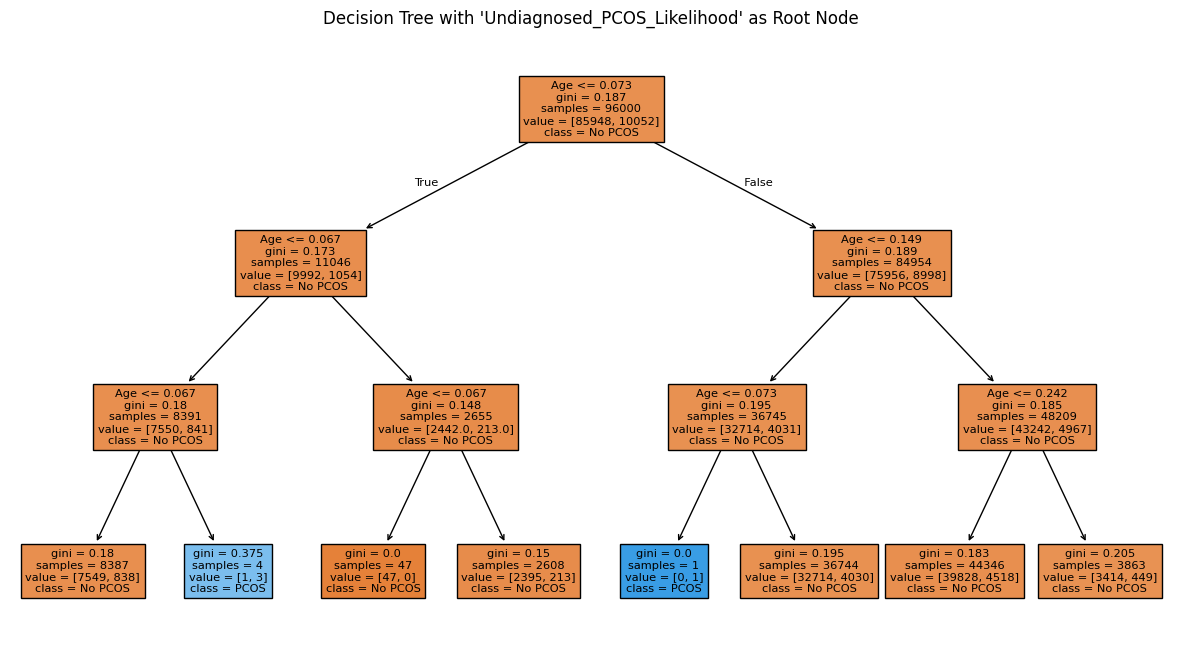

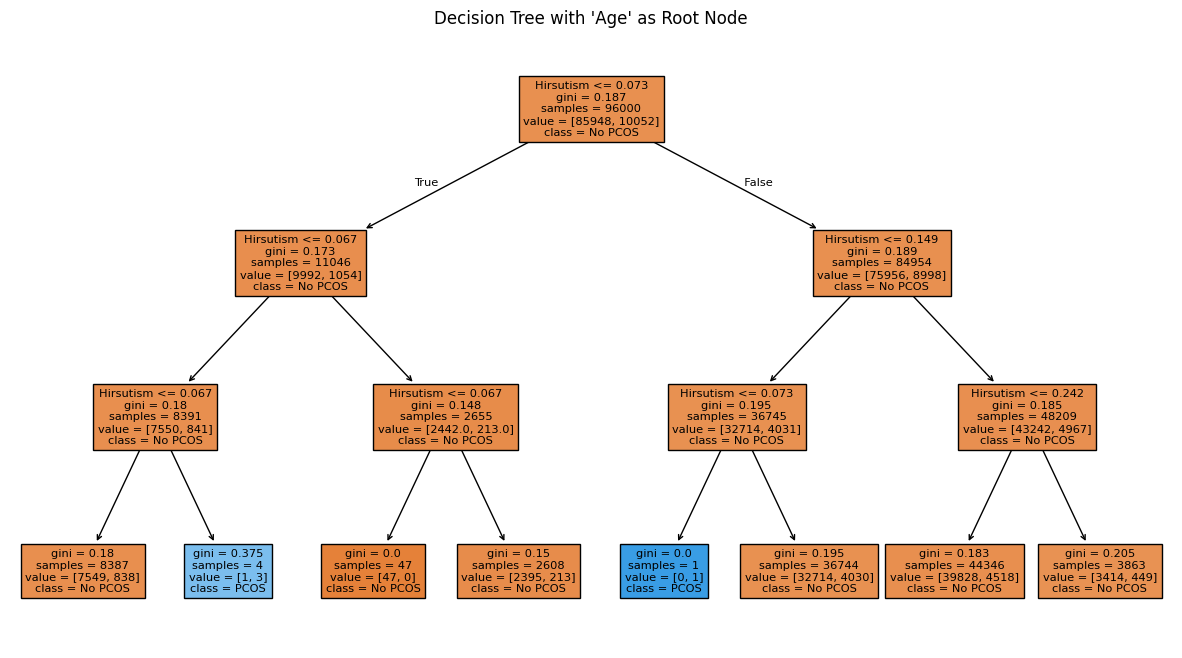

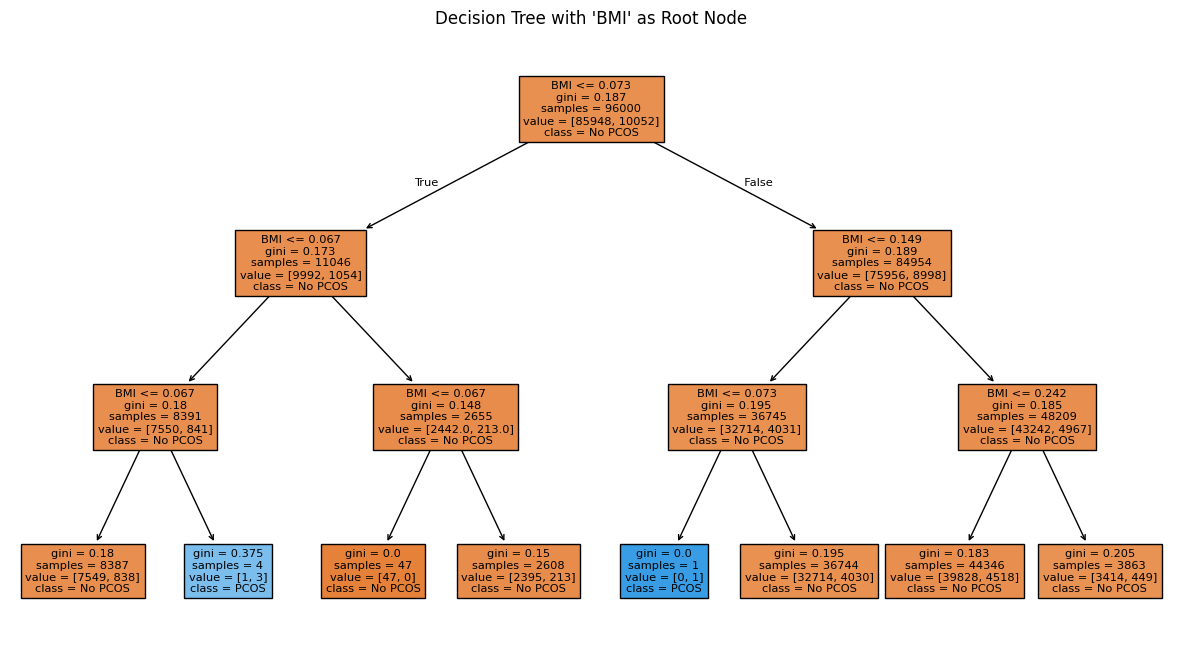

In [22]:
# Step 7: Creating Decision Trees with Different Root Nodes for Global PCOS Demographics Dataset

# Identify the top 3 most important features
top_features_demo = ["Undiagnosed_PCOS_Likelihood", "Age", "BMI"]

# Train Decision Trees prioritizing different root nodes by ordering features
dt_demo_top1_root = DecisionTreeClassifier(criterion="gini", random_state=42, max_depth=3)
dt_demo_top1_root.fit(X_train_demo_tree[top_features_demo + list(set(X_train_demo_tree.columns) - set(top_features_demo))], y_train_demo_tree)

dt_demo_top2_root = DecisionTreeClassifier(criterion="gini", random_state=42, max_depth=3)
dt_demo_top2_root.fit(X_train_demo_tree[top_features_demo[1:] + [top_features_demo[0]]], y_train_demo_tree)

dt_demo_top3_root = DecisionTreeClassifier(criterion="gini", random_state=42, max_depth=3)
dt_demo_top3_root.fit(X_train_demo_tree[top_features_demo[2:] + top_features_demo[:2]], y_train_demo_tree)

# Visualizing the Decision Trees with different root nodes

# Decision Tree with "Undiagnosed_PCOS_Likelihood" as Root Node
plt.figure(figsize=(15, 8))
plot_tree(dt_demo_top1_root, feature_names=X_train_demo_tree.columns, class_names=["No PCOS", "PCOS"], filled=True)
plt.title(f"Decision Tree with '{top_features_demo[0]}' as Root Node")
plt.show()

# Decision Tree with "Age" as Root Node
plt.figure(figsize=(15, 8))
plot_tree(dt_demo_top2_root, feature_names=X_train_demo_tree.columns, class_names=["No PCOS", "PCOS"], filled=True)
plt.title(f"Decision Tree with '{top_features_demo[1]}' as Root Node")
plt.show()

# Decision Tree with "BMI" as Root Node
plt.figure(figsize=(15, 8))
plot_tree(dt_demo_top3_root, feature_names=X_train_demo_tree.columns, class_names=["No PCOS", "PCOS"], filled=True)
plt.title(f"Decision Tree with '{top_features_demo[2]}' as Root Node")
plt.show()


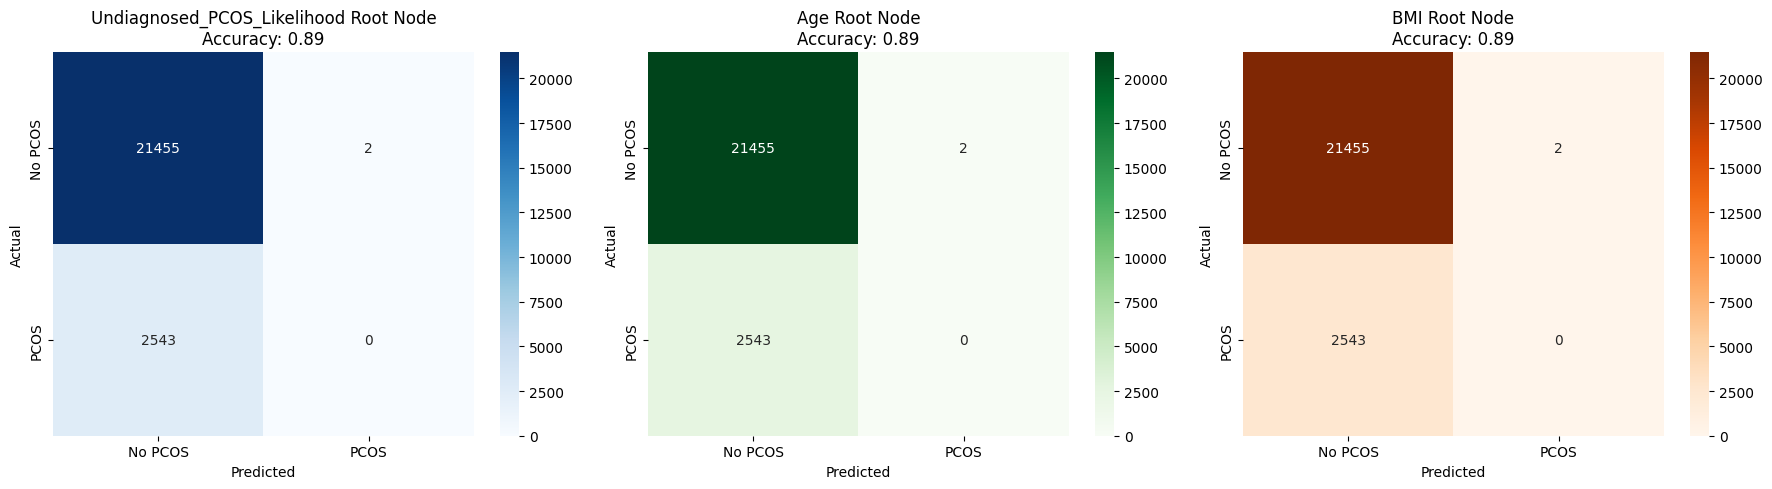

In [23]:
# Step 8: Confusion Matrices and Visualization for Global PCOS Decision Trees with Different Root Nodes

# Ensure feature orders match during testing for each tree
X_test_demo_tree_top1 = X_test_demo_tree[top_features_demo + list(set(X_test_demo_tree.columns) - set(top_features_demo))]
X_test_demo_tree_top2 = X_test_demo_tree[top_features_demo[1:] + [top_features_demo[0]]]
X_test_demo_tree_top3 = X_test_demo_tree[top_features_demo[2:] + top_features_demo[:2]]

# Predictions
y_pred_demo_top1_root = dt_demo_top1_root.predict(X_test_demo_tree_top1)
y_pred_demo_top2_root = dt_demo_top2_root.predict(X_test_demo_tree_top2)
y_pred_demo_top3_root = dt_demo_top3_root.predict(X_test_demo_tree_top3)

# Confusion matrices and accuracies
acc_demo_top1 = accuracy_score(y_test_demo_tree, y_pred_demo_top1_root)
acc_demo_top2 = accuracy_score(y_test_demo_tree, y_pred_demo_top2_root)
acc_demo_top3 = accuracy_score(y_test_demo_tree, y_pred_demo_top3_root)

cm_demo_top1 = confusion_matrix(y_test_demo_tree, y_pred_demo_top1_root)
cm_demo_top2 = confusion_matrix(y_test_demo_tree, y_pred_demo_top2_root)
cm_demo_top3 = confusion_matrix(y_test_demo_tree, y_pred_demo_top3_root)

# Plotting all 3 confusion matrices
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.heatmap(cm_demo_top1, annot=True, fmt="d", cmap="Blues", ax=axes[0],
            xticklabels=["No PCOS", "PCOS"], yticklabels=["No PCOS", "PCOS"])
axes[0].set_title(f"{top_features_demo[0]} Root Node\nAccuracy: {acc_demo_top1:.2f}")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

sns.heatmap(cm_demo_top2, annot=True, fmt="d", cmap="Greens", ax=axes[1],
            xticklabels=["No PCOS", "PCOS"], yticklabels=["No PCOS", "PCOS"])
axes[1].set_title(f"{top_features_demo[1]} Root Node\nAccuracy: {acc_demo_top2:.2f}")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

sns.heatmap(cm_demo_top3, annot=True, fmt="d", cmap="Oranges", ax=axes[2],
            xticklabels=["No PCOS", "PCOS"], yticklabels=["No PCOS", "PCOS"])
axes[2].set_title(f"{top_features_demo[2]} Root Node\nAccuracy: {acc_demo_top3:.2f}")
axes[2].set_xlabel("Predicted")
axes[2].set_ylabel("Actual")

plt.tight_layout()
plt.show()
